In [1]:
import sys
sys.path.append('../')
from read_data_functions import *
from plot_functions import *
from calculations import *
plt.style.use('../Style.mplstyle')
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None  # suppress warnings

(0.0, 3.25)

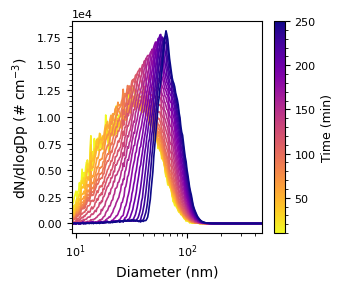

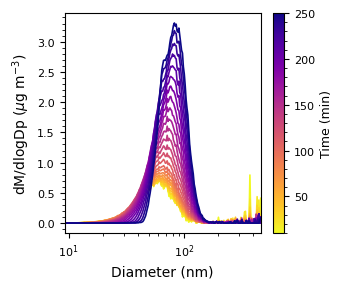

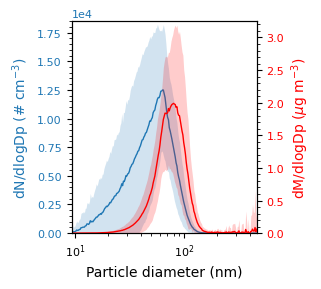

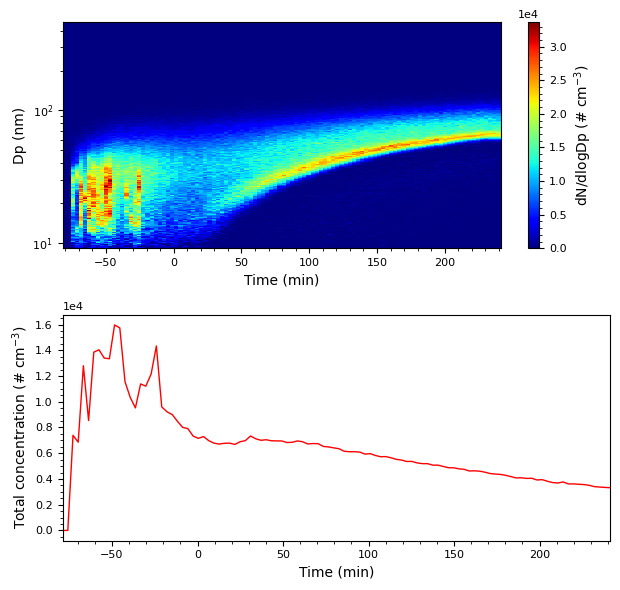

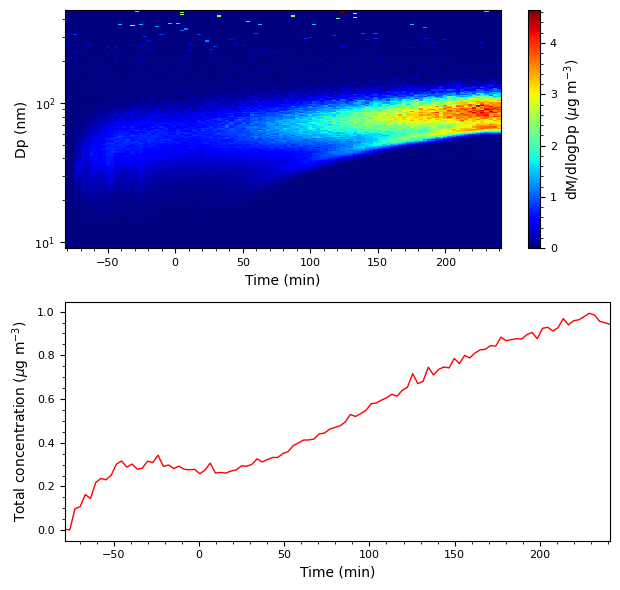

In [5]:
path = '../../../Data/2026/260113_Vanillin_gas_particle_UV/'
SMPS = import_SMPS(f'{path}SMPS/', '', 0)
save_path = 'Figures/260113_vanillin(aq)_RH20/'
for key in SMPS.keys():
    SMPS[key].rename(columns = {SMPS[key].keys()[38]:'Total concentration'}, inplace = True)

SMPS_keys = [['260113-vanillin_number'], ['260113-vanillin_mass']]
timestamps = [['2026-01-13 13:16', '2026-01-13 18:42']]
ax, ax_2 = plot_SMPS(SMPS, SMPS_keys, SMPS['260113-vanillin_mass'].keys()[42:-1], 9.07, 'number and mass', timestamps, 10, 
                     'Total concentration', '2026-01-13 14:36', 1, 1, save_path)
ax[0].set_ylim(0, 1.85*10**4)
ax_2[0].set_ylim(0, 3.25)